## L2 norm estimation of the equivalent layer parameters

This notebook evaluates the predicted data obtained by an equivalent layer located at a specific depth.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from coord import GGS
from equiv_layer import EqLayer
from carto_map_plot import point_map
import config_style_plot as style

# Redefining functions
geodetic2cartesian = GGS().geodetic2cartesian
rotation_matrix = GGS().rotation_matrix
# Plot style
style.plot_params()

In [2]:
def L1_estim(rcl, pcl, Acc_l, it_max):
    for i in range(it_max):
#         print i
        res = rcl - np.dot(Acc_l, pcl)
        W = np.dot(Acc_l.T, np.diag(1./(np.abs(res)+1e-10)) )
        pcl = np.linalg.solve(np.dot(W, Acc_l), np.dot(W, rcl))
    return pcl

In [3]:
# IMPORTING BDG FILE
header=['LONG', 'LAT', 'ALT_GEOM', 'GRAV']
path = '../data/BDG/'
uf = 'RS'
name_bdg = '_file.txt'
bdg = pd.read_csv('{p}{u}{ne}'.format(p=path,u=uf,ne=name_bdg), sep='\s+',names=header, skiprows=1)
# bdg

In [4]:
# IMPORTING EIGEN FILE
name_eigen = '.dat'
eigen = pd.read_csv('{p}{u}{ne}'.format(p=path,u=uf,ne=name_eigen), sep='\s+',skiprows=32, \
                    usecols=(4,), names=['GRAV'])
# eigen

In [5]:
# Obtaining short wavelength signals
disturb = bdg.GRAV.values - eigen.GRAV.values

data = {'LONG':bdg.LONG.values, \
        'LAT':bdg.LAT.values, \
        'ALT':bdg.ALT_GEOM.values, \
        'BDG':bdg.GRAV.values, \
        'EIGEN':eigen.GRAV.values, \
        'DIST':disturb}
df = pd.DataFrame(data)
df

,LONG,LAT,ALT,BDG,EIGEN,DIST
0,-54.37440,-29.10520,396.750,979145.18,979143.121444,2.058556
1,-54.32250,-29.09580,346.940,979156.22,979154.349000,1.871000
2,-54.27860,-29.12220,363.240,979153.35,979153.382778,-0.032778
3,-54.23530,-29.15350,404.930,979146.33,979150.873776,-4.543777
4,-54.18750,-29.22220,458.060,979139.53,979141.036634,-1.506634
...,...,...,...,...,...,...
1534,-50.24190,-29.89459,24.454,979273.43,979285.784885,-12.354885
1535,-52.85949,-29.70025,134.924,979250.28,979252.465849,-2.185849
1536,-52.91240,-30.04538,67.731,979309.53,979308.788001,0.741999
1537,-51.52914,-29.27031,686.433,979081.80,979076.824480,4.975520


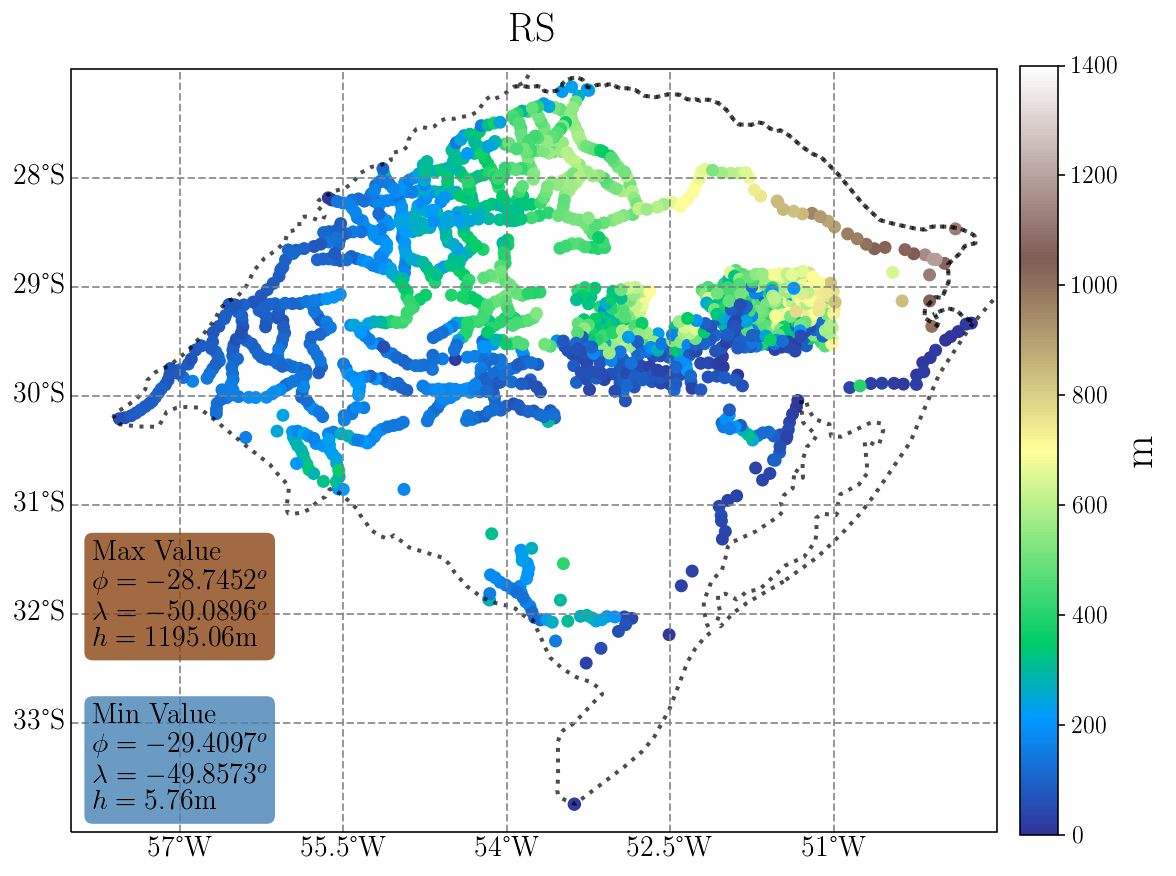

In [6]:
point_map(df.LONG, df.LAT, df.ALT, df.ALT, uf, fig_size=(10.,12.), region=[-58,-49.5,-34,-27], \
          sign=(-57.8,-57.8,-32.3,-33.8), cmap='terrain', lim_val=(True,True,0.,1400.), shrink=0.59)

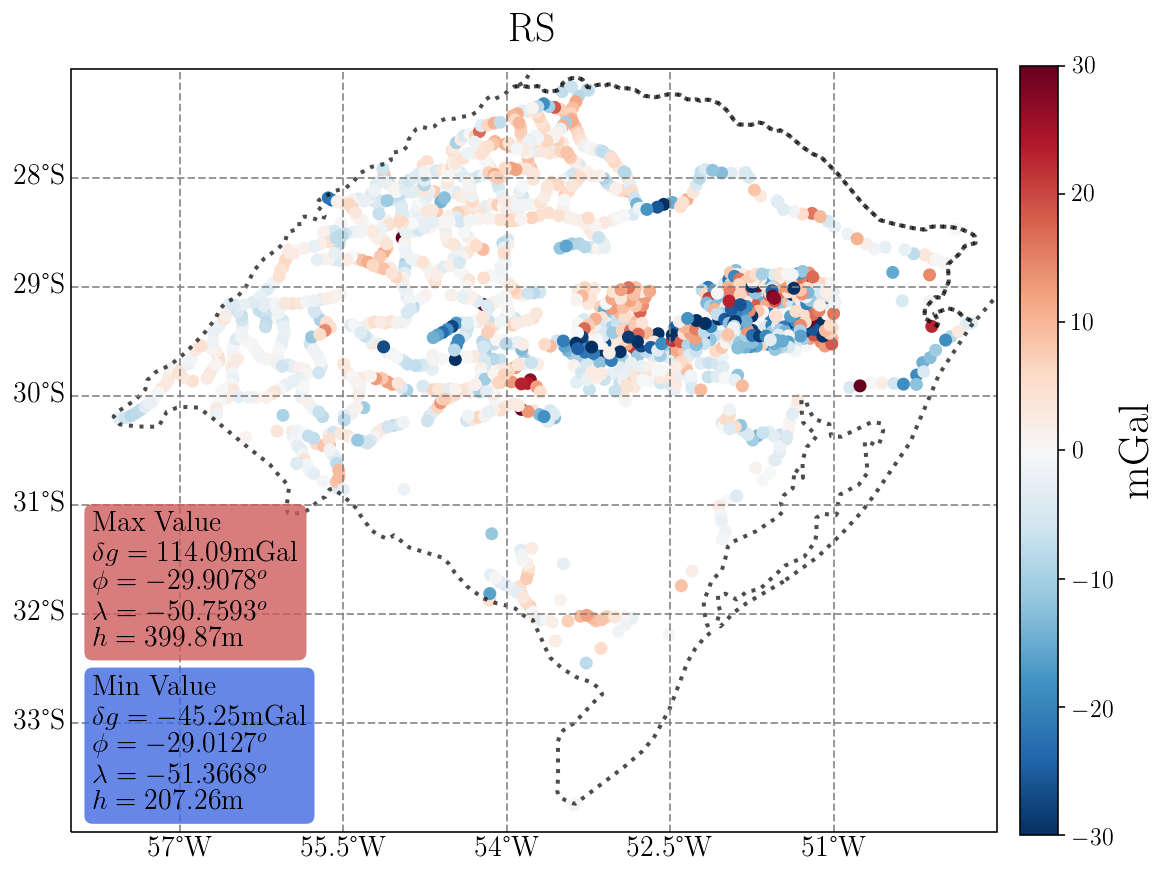

In [7]:
point_map(df.LONG, df.LAT, df.ALT, df.DIST, uf, fig_size=(10.,12.), region=[-58,-49.5,-34,-27], \
          sign=(-57.8,-57.8,-32.3,-33.8), lim_val=(True, 30), shrink=0.59)

In [8]:
# index = np.argmax(df.ALT.values)
# print('MAX', index, df.ALT[index], df.DIST[index])

# index = np.argmin(df.ALT.values)
# print('MIN', index, df.ALT[index], df.DIST[index])

In [9]:
# index_max = np.argmax(df.DIST.values)
# print('MAX', index_max, df.ALT[index_max], df.DIST[index_max])

# index_min = np.argmin(df.DIST.values)
# print('MIN', index_min, df.ALT[index_min], df.DIST[index_min])
# print(disturb.size)

In [10]:
# disturb = np.delete(df.DIST.values, [index_max])
# longitude = np.delete(df.LONG.values,[index_max])
# latitude = np.delete(df.LAT.values, [index_max])
# altitude = np.delete(df.ALT.values, [index_max])
# print(disturb.size, longitude.size, latitude.size, altitude.size)
disturb = np.copy(df.DIST.values)
longitude = np.copy(df.LONG.values)
latitude = np.copy(df.LAT.values)
altitude = np.copy(df.ALT.values)
print(disturb.size, longitude.size, latitude.size, altitude.size)

1539 1539 1539 1539


In [11]:
# index_min = np.argmin(disturb)
# print('MAX', index_min, altitude[index_min], disturb[index_min])

In [12]:
# point_map(longitude, latitude, altitude, disturb, uf, fig_size=(10.,12.), region=[-58,-49.5,-34,-27], \
#           sign=(-57.8,-57.8,-32.3,-33.8), lim_val=(True, 30), shrink=0.59)

In [13]:
# index_max = np.argmax(disturb)
# print('MIN', index_max, altitude[index_max], disturb[index_max])
# disturb = np.delete(disturb, [index_max])
# longitude = np.delete(longitude,[index_max])
# latitude = np.delete(latitude, [index_max])
# altitude = np.delete(altitude, [index_max])
# print(disturb.size, longitude.size, latitude.size, altitude.size)

In [14]:
# point_map(longitude, latitude, altitude, disturb, uf, fig_size=(10.,12.), region=[-58,-49.5,-34,-27], \
#           sign=(-57.8,-57.8,-32.3,-33.8), lim_val=(True, 30), shrink=0.59)

### Calculating rotation matrices and Cartesian coordinates

In [15]:
# Calculating Cartesian coordinates
# x, y, z = geodetic2cartesian(df.LONG, df.LAT, df.ALT)
# R = np.array(rotation_matrix(df.LONG, df.LAT))
x, y, z = geodetic2cartesian(longitude, latitude, altitude)
R = np.array(rotation_matrix(longitude, latitude))

## Estimating the first set of point-mass parameters

In [16]:
pc = []
hc = []
indc = []
xc = []
yc = []
zc = []
Rc = []
rabs_max = []
taur = 1e-11 #1e-5 #0.05
tauc = 1e-3
it_max_l1 = 5
latc = []
lonc = []

## Iteração 1 - L2 norm

In [17]:
indl = np.arange(disturb.size)
# mi_c = 1e-5
mi_c = 1e-30
hcl = 4000. #5000. #14200. # 20000. #800. #1000.
print(hcl, type(indl)) #indl

4000.0 <class 'numpy.ndarray'>


In [18]:
rcl = disturb[indl]
xcl = x[indl]
ycl = y[indl]
zcl = z[indl]

# latcl = df.LAT[indl]
# loncl = df.LONG[indl]
latcl = latitude[indl]
loncl = longitude[indl]

In [19]:
Rcl = R[:, indl]

In [20]:
# Calculo de Acc_l
hlay = np.zeros(indl.size) - hcl
xlay, ylay, zlay = geodetic2cartesian(loncl, latcl, hlay)
# Lay = EqLayer(df.LONG, df.LAT, np.zeros_like(df.LONG)-hcl)
Lay = EqLayer(longitude, latitude, np.zeros_like(longitude)-hcl)
layer = Lay.build_layer(xlay, ylay, zlay)
Acc_l = Lay.designMat(xcl, ycl, zcl, Rcl, layer)
print(Acc_l.shape)

(1539, 1539)


In [21]:
H = np.dot(Acc_l.T, Acc_l)
# H += mi_c*np.trace(H)*np.identity(indl.size)
H += (mi_c*np.trace(H)*np.identity(indl.size))/indl.size

In [22]:
p_L2 = np.linalg.solve(H, np.dot(Acc_l.T, rcl))
print(p_L2.size)
# p_L1 = L1_estim(rcl, p_L2, Acc_l, 5)

1539


In [23]:
rcl -= np.dot(Acc_l, p_L2)
# print rcl[:50]

In [24]:
rabs_max_l = np.max(np.abs(rcl))
rabs_max_l

10.699482781349927

In [25]:
pc.append(p_L2)
hc.append(hcl)
indc.append(indl)
xc.append(xcl)
yc.append(ycl)
zc.append(zcl)
Rc.append(Rcl)
latc.append(latcl)
lonc.append(loncl)

In [26]:
rabs_max.append(rabs_max_l)

In [27]:
rc = rcl[:] #r1
print(np.max(np.abs(rc)))

10.699482781349927


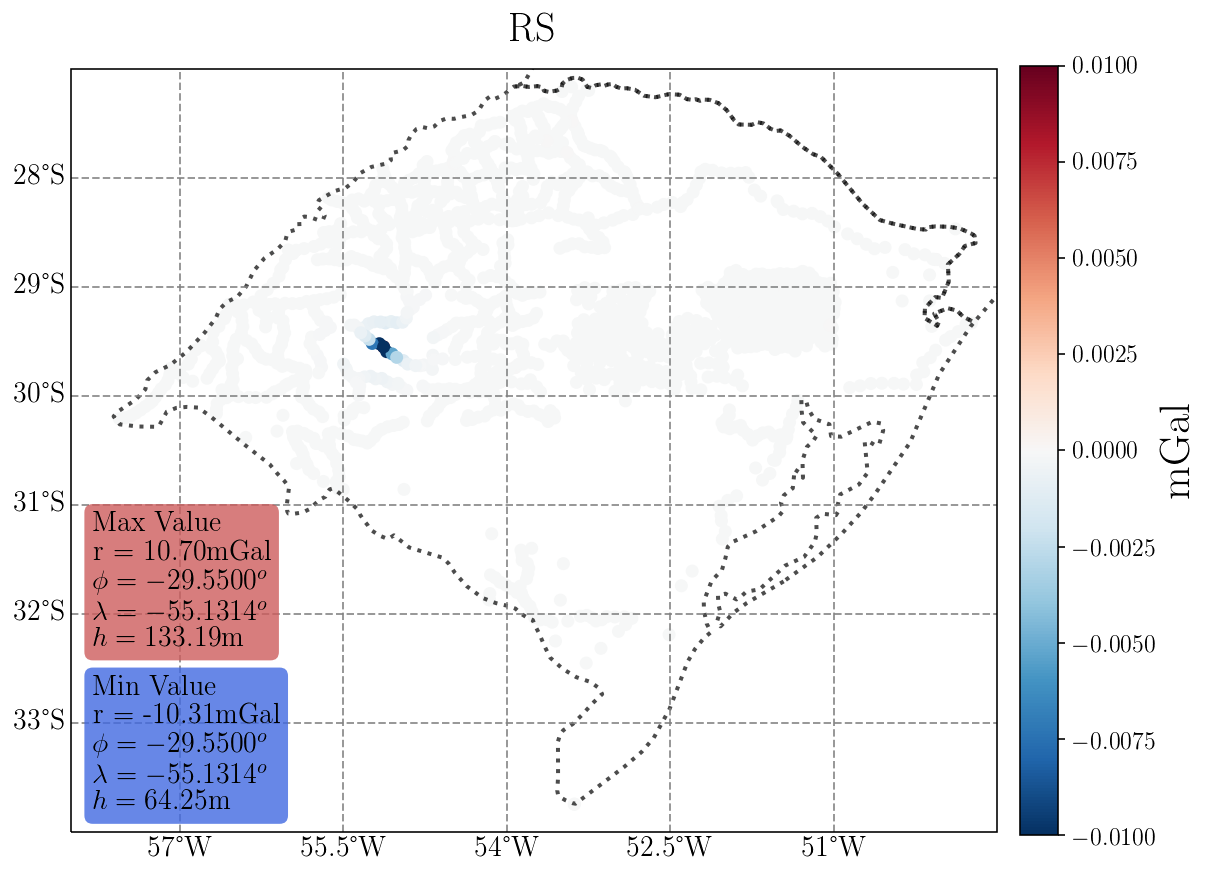

In [28]:
point_map(longitude, latitude, altitude, rc, uf, fig_size=(10.,12.), region=[-58,-49.5,-34,-27], \
          sign=(-57.8,-57.8,-32.3,-33.8), shrink=0.59, residual=True, lim_val=(True, 1e-2))

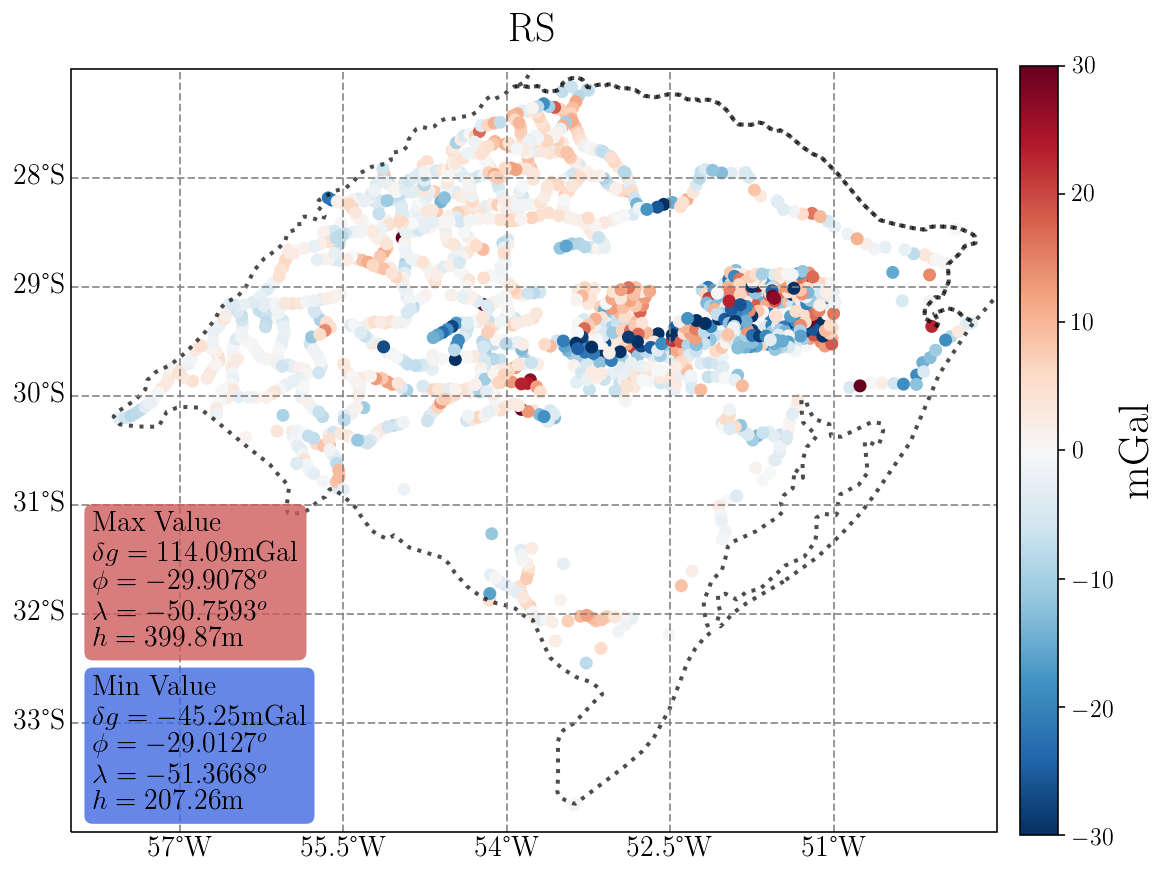

In [29]:
point_map(longitude, latitude, altitude, disturb, uf, fig_size=(10.,12.), region=[-58,-49.5,-34,-27], \
          sign=(-57.8,-57.8,-32.3,-33.8), lim_val=(True, 30), shrink=0.59)

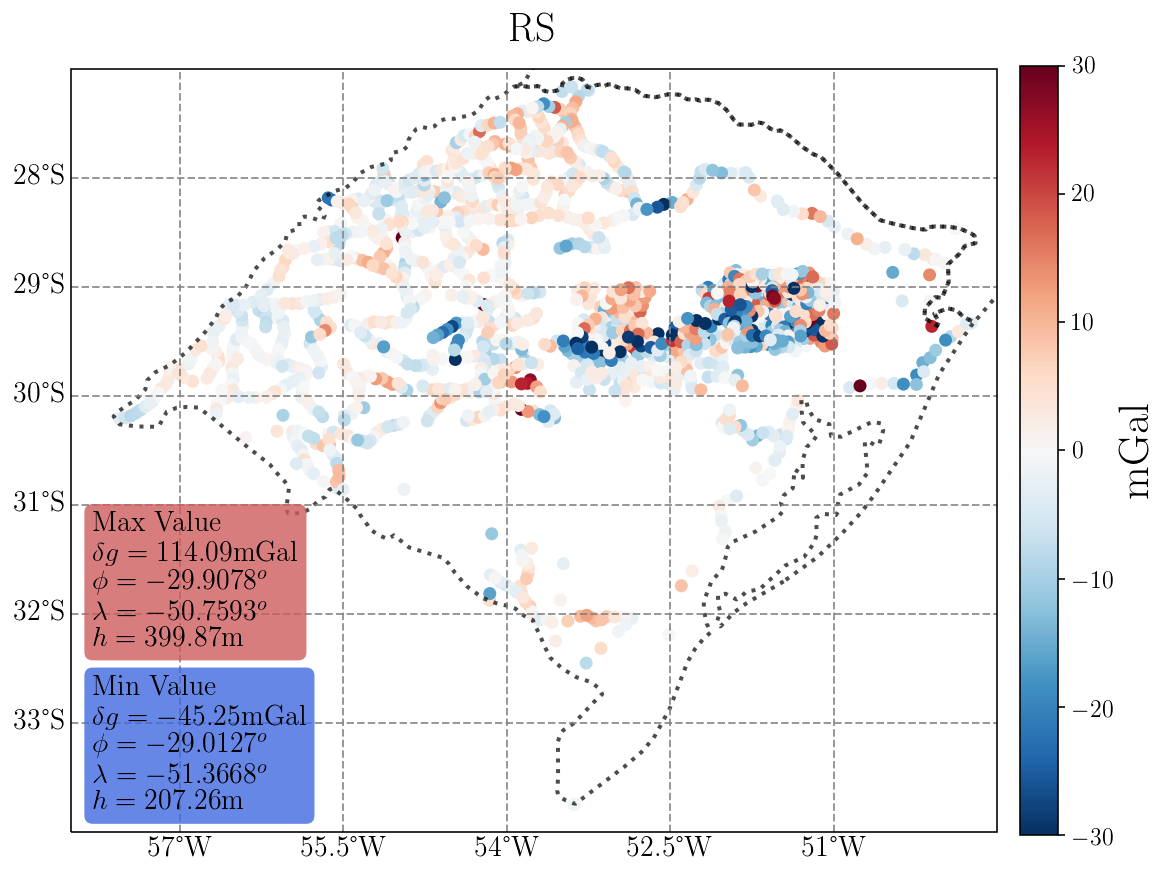

In [30]:
point_map(longitude, latitude, altitude, np.dot(Acc_l, p_L2), uf, fig_size=(10.,12.), \
          region=[-58,-49.5,-34,-27], sign=(-57.8,-57.8,-32.3,-33.8), lim_val=(True, 30), shrink=0.59)

In [31]:
# print(len([value for value in rc if value > 1e-5]))
# print([value for value in rc if value > 1e-5])

In [32]:
new_data = {'LONG':longitude, \
            'LAT':latitude, \
            'ALT':altitude, \
            'BDG':bdg.GRAV.values, \
            'EIGEN':eigen.GRAV.values, \
            'DIST':disturb, \
            'RHO':p_L2, \
            'RESID':rc}
# new_data = {'LONG':longitude, \
#             'LAT':latitude, \
#             'ALT':altitude, \
#             'BDG':np.delete(bdg.GRAV.values,index_max), \
#             'EIGEN':np.delete(eigen.GRAV.values, index_max), \
#             'DIST':disturb, \
#             'RHO':p_L2, \
#             'RESID':rc}
df = pd.DataFrame(new_data)
df

,LONG,LAT,ALT,BDG,EIGEN,DIST,RHO,RESID
0,-54.37440,-29.10520,396.750,979145.18,979143.121444,2.058556,3.120747e+12,-1.855479e-05
1,-54.32250,-29.09580,346.940,979156.22,979154.349000,1.871000,4.381509e+12,-1.445742e-05
2,-54.27860,-29.12220,363.240,979153.35,979153.382778,-0.032778,-1.410930e+13,-1.153260e-05
3,-54.23530,-29.15350,404.930,979146.33,979150.873776,-4.543777,-1.223261e+14,-1.285995e-05
4,-54.18750,-29.22220,458.060,979139.53,979141.036634,-1.506634,-3.176191e+12,-4.956346e-06
...,...,...,...,...,...,...,...,...
1534,-50.24190,-29.89459,24.454,979273.43,979285.784885,-12.354885,-6.139471e+12,-6.260339e-07
1535,-52.85949,-29.70025,134.924,979250.28,979252.465849,-2.185849,1.839235e+11,-1.845800e-06
1536,-52.91240,-30.04538,67.731,979309.53,979308.788001,0.741999,3.476402e+11,-2.770995e-06
1537,-51.52914,-29.27031,686.433,979081.80,979076.824480,4.975520,1.960214e+13,-6.324596e-08


In [33]:
print(df.RESID.min(), df.RESID.max())

-10.30803427714645 10.699482781349927


### Upward Continuation

In [34]:
# up_cont = Lay.continuation(df.LONG,df.LAT,6000.,df.LONG,df.LAT,-3000.,p_L2)

In [35]:
Layer = EqLayer(df.LONG, df.LAT, np.zeros_like(df.LONG)-hcl)
up_cont = Layer.continuation(df.LONG,df.LAT,3000.,-3000.,p_L2)

The transformation is an upward continuation


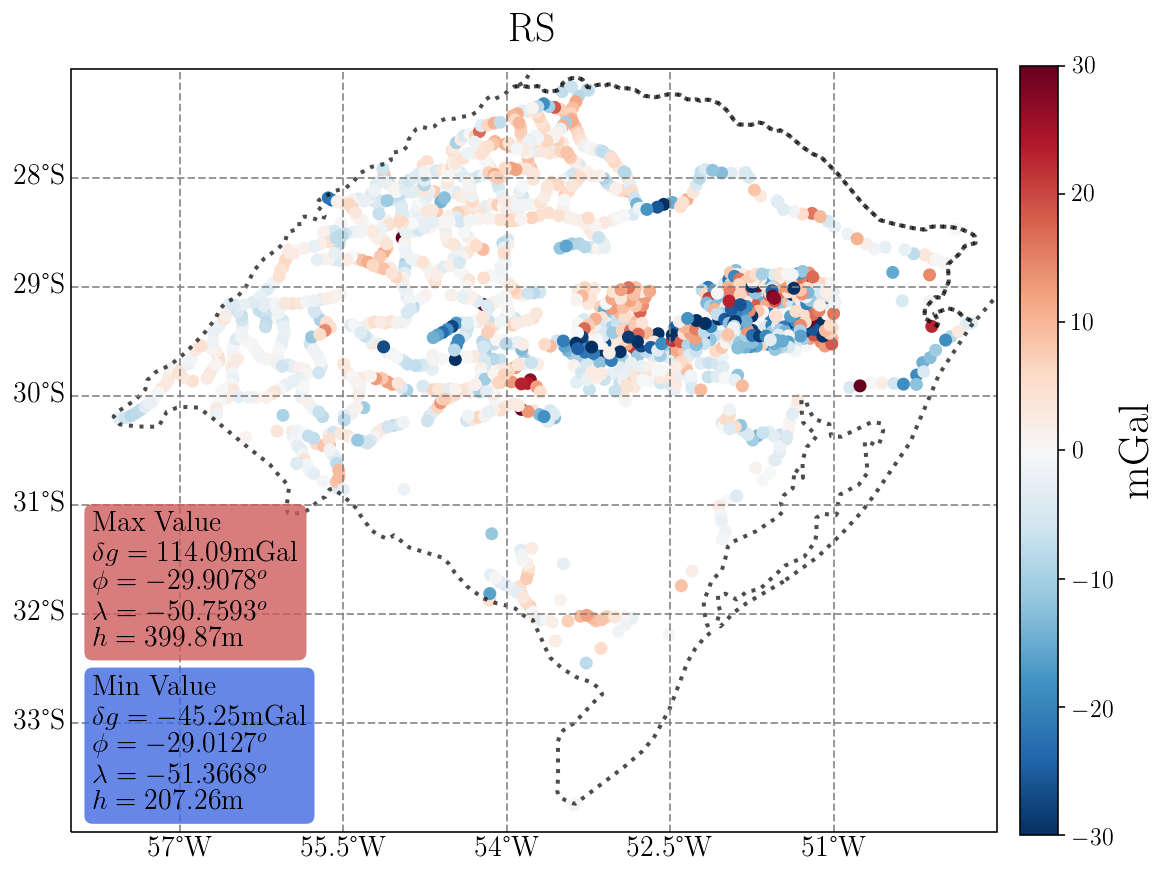

In [36]:
point_map(df.LONG, df.LAT, df.ALT, df.DIST, uf, fig_size=(10.,12.), region=[-58,-49.5,-34,-27], \
          sign=(-57.8,-57.8,-32.3,-33.8), lim_val=(True, 30), shrink=0.59)

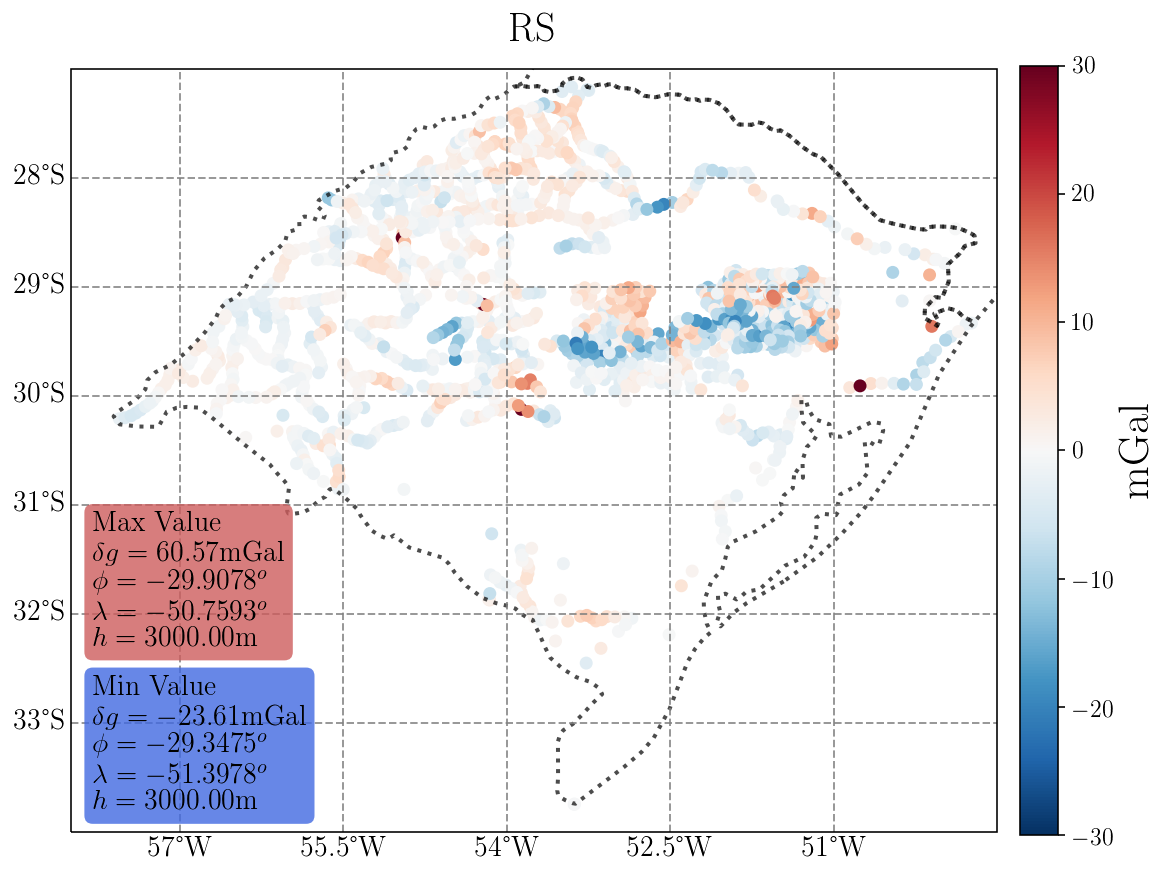

In [37]:
point_map(df.LONG, df.LAT, np.zeros_like(df.LONG)+3000., up_cont, uf, fig_size=(10.,12.), \
          region=[-58,-49.5,-34,-27], sign=(-57.8,-57.8,-32.3,-33.8), lim_val=(True, 30), shrink=0.59)

In [38]:
Layer = EqLayer(df.LONG, df.LAT, np.zeros_like(df.LONG)-hcl)
up_cont = Layer.continuation(df.LONG, df.LAT,6000.,-3000.,p_L2)

The transformation is an upward continuation


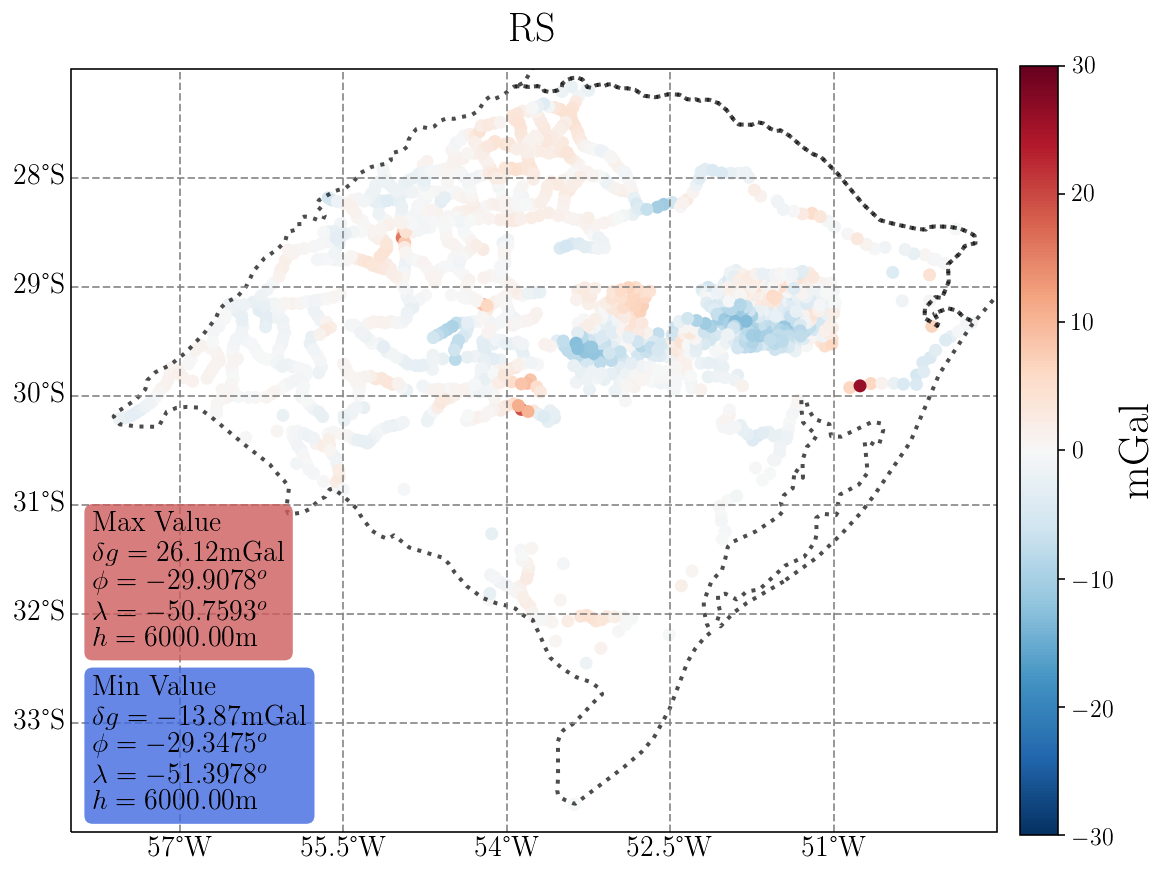

In [39]:
point_map(df.LONG, df.LAT, np.zeros_like(df.LONG)+6000., up_cont, uf, fig_size=(10.,12.), \
          region=[-58,-49.5,-34,-27], sign=(-57.8,-57.8,-32.3,-33.8), lim_val=(True, 30), shrink=0.59)

In [40]:
Layer = EqLayer(df.LONG, df.LAT, np.zeros_like(df.LONG)-hcl)
up_cont = Layer.continuation(df.LONG,df.LAT,9000.,-3000.,p_L2)

The transformation is an upward continuation


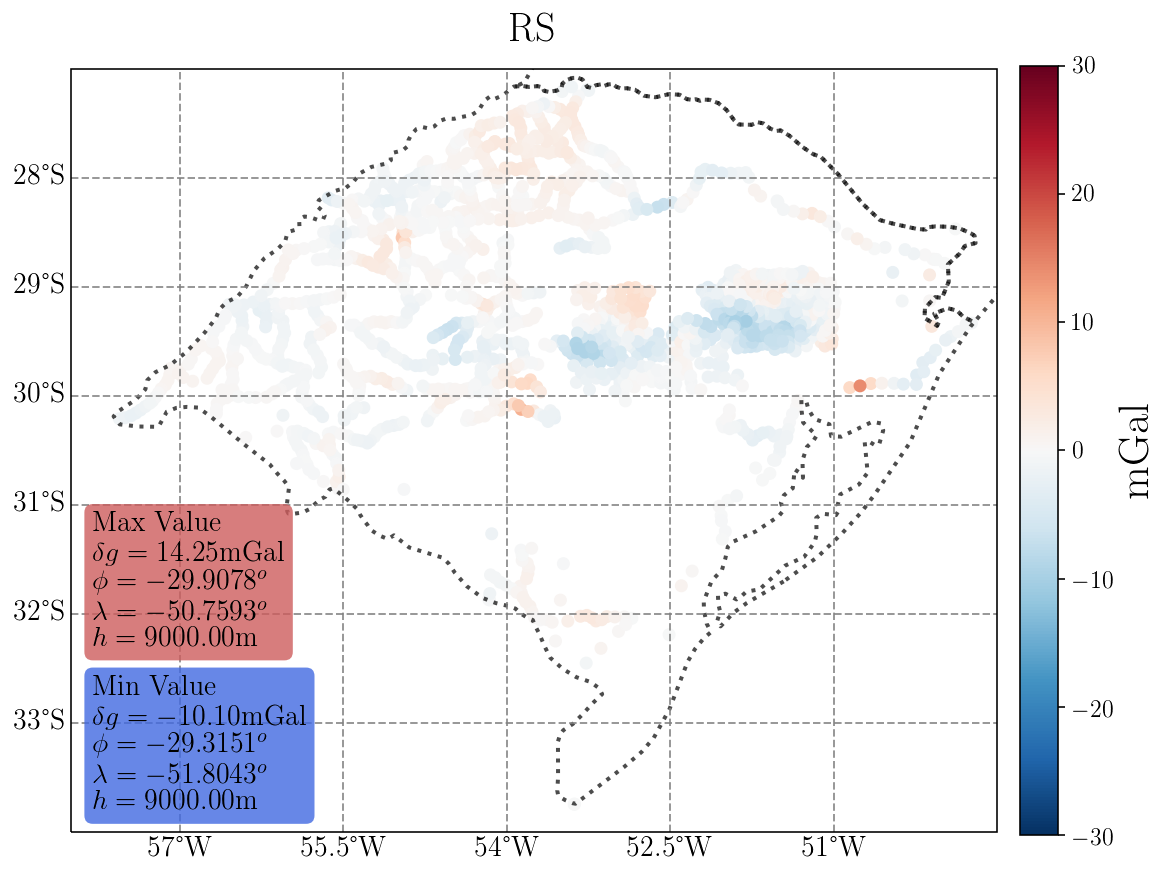

In [41]:
point_map(df.LONG, df.LAT, np.zeros_like(df.LONG)+9000., up_cont, uf, fig_size=(10.,12.), \
          region=[-58,-49.5,-34,-27], sign=(-57.8,-57.8,-32.3,-33.8), lim_val=(True, 30), shrink=0.59)